<a href="https://colab.research.google.com/github/U-Aravindhakumar/Entertainer-Data-Analytics/blob/main/Entertainer_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entertainer Data Analytics

## Analyze the Entertainer Basic Info Dataset:

### Load the packages

In [93]:
#Importing Necessarylibreries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [94]:
df_Basic = pd.read_excel( "/content/drive/MyDrive/ColabNootebooks/Entertainer - Basic Info.xlsx")

### Read the Data

In [95]:
# View the basic info data of Entertainers
df_Basic.head(10)

,Entertainer,Gender (traditional),Birth Year
0,Adele,F,1988
1,Angelina Jolie,F,1975
2,Aretha Franklin,F,1942
3,Bette Davis,F,1908
4,Betty White,F,1922
5,Bing Crosby,M,1903
6,Bob Hope,M,1903
7,Carol Burnett,F,1933
8,Carole Lombard,F,1908
9,Carrie Fisher,F,1956


### Data Cleaning

In [96]:
df_Basic.isnull().sum()  #there is no null values.

Entertainer             0
Gender (traditional)    0
Birth Year              0
dtype: int64

In [97]:
df_Basic.describe().T #here we wil get statistical metrics.

,count,mean,std,min,25%,50%,75%,max
Birth Year,70.0,1935.585714,24.135783,1889.0,1916.0,1935.5,1954.0,1988.0


## Analyze the Entertainer Breakthrough Info Dataset

In [98]:
# Import Entertainer_Breakthrough Info
df_Breakthrough = pd.read_excel("/content/drive/MyDrive/ColabNootebooks/Entertainer - Breakthrough Info.xlsx")

### Read the Data

In [99]:
df_Breakthrough.head(10)

,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0
2,Aretha Franklin,1967,I Never Loved a Man (The Way I Love You),1968.0
3,Bette Davis,1934,Of Human Bondage,1935.0
4,Betty White,1952,Life with Elilzabeth,1976.0
5,Bing Crosby,1931,Several Songs,1962.0
6,Bob Hope,1938,The Big Broadcast of 1938,1940.0
7,Carol Burnett,1959,The Garry Moore Show,1962.0
8,Carole Lombard,1934,Twentieth Century,NaN
9,Carrie Fisher,1977,Star Wars,NaN


### Data Cleaning

In [100]:
df_Breakthrough.isnull().sum()  #there are few null values but those are not important.

Entertainer                                     0
Year of Breakthrough/#1 Hit/Award Nomination    0
Breakthrough Name                               0
Year of First Oscar/Grammy/Emmy                 6
dtype: int64

In [101]:
df_Breakthrough.describe().T

,count,mean,std,min,25%,50%,75%,max
Year of Breakthrough/#1 Hit/Award Nomination,70.0,1964.228571,22.411935,1915.0,1949.5,1963.5,1983.5,2008.0
Year of First Oscar/Grammy/Emmy,64.0,1976.234375,22.170152,1929.0,1962.0,1978.0,1993.0,2017.0


## Analyze the Entertainer Last work Info Dataset

In [102]:
# Import Entertainer_Last work info
df_Last_work_info = pd.read_excel("/content/drive/MyDrive/ColabNootebooks/Entertainer - Last work Info.xlsx")

### Read the data

In [103]:
df_Last_work_info.head(10)

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN
5,Bing Crosby,1974,1977.0
6,Bob Hope,1972,2003.0
7,Carol Burnett,2016,NaN
8,Carole Lombard,1942,1942.0
9,Carrie Fisher,2016,2016.0


### Data Cleaning

In [104]:
df_Last_work_info.isnull().sum()  #there are few null values but those are not important.

Entertainer                            0
Year of Last Major Work (arguable)     0
Year of Death                         40
dtype: int64

## Data Visualization

Evolution of Breakthroughs in the Entertainment Industry

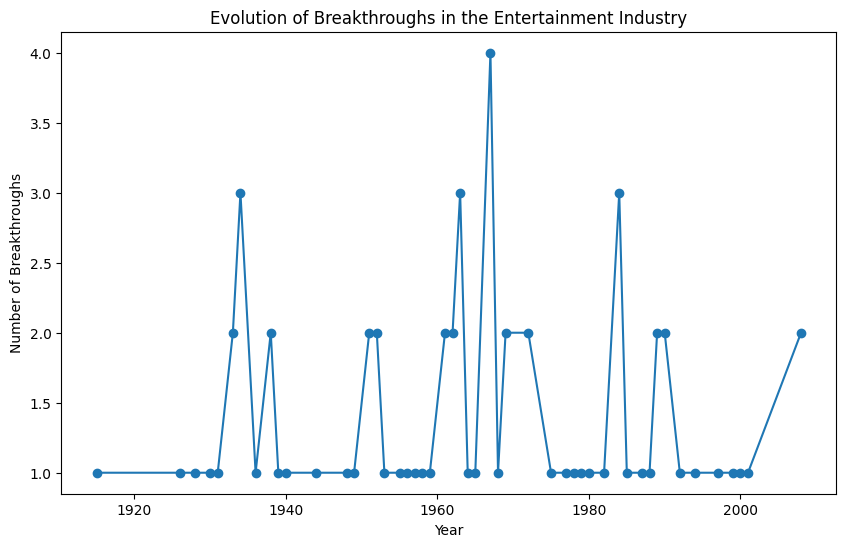

In [105]:
breakthrough_years = df_Breakthrough.groupby('Year of Breakthrough/#1 Hit/Award Nomination')['Entertainer'].count()
plt.figure(figsize=(10, 6))
plt.plot(breakthrough_years.index, breakthrough_years.values, marker='o')
plt.title('Evolution of Breakthroughs in the Entertainment Industry')
plt.xlabel('Year')
plt.ylabel('Number of Breakthroughs')
plt.show()

Comparison of Birth Year, Breakthrough Year, and Last Major Work Year

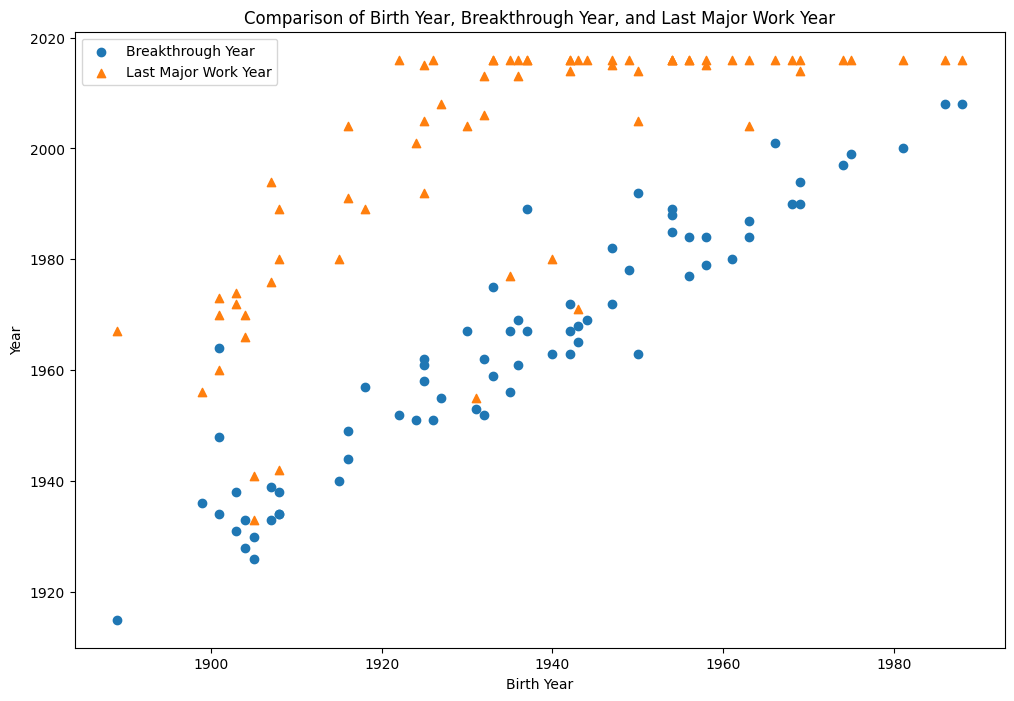

In [106]:
merged_data = pd.merge(df_Basic, df_Breakthrough, on='Entertainer', how='inner')
merged_data = pd.merge(merged_data, df_Last_work_info, on='Entertainer', how='inner')
plt.figure(figsize=(12, 8))
plt.scatter(merged_data['Birth Year'], merged_data['Year of Breakthrough/#1 Hit/Award Nomination'], label='Breakthrough Year')
plt.scatter(merged_data['Birth Year'], merged_data['Year of Last Major Work (arguable)'], label='Last Major Work Year', marker='^')
plt.title('Comparison of Birth Year, Breakthrough Year, and Last Major Work Year')
plt.xlabel('Birth Year')
plt.ylabel('Year')
plt.legend()
plt.show()

Correlation analysis

In [107]:
correlation = merged_data['Year of Breakthrough/#1 Hit/Award Nomination'].corr(merged_data['Year of Last Major Work (arguable)'])
print(f"Correlation between Breakthrough Year and Last Major Work Year: {correlation}")


Correlation between Breakthrough Year and Last Major Work Year: 0.7486752283778754


In [108]:
print("Missing values in the merged dataset:")
print(merged_data.isnull().sum())

Missing values in the merged dataset:
Entertainer                                      0
Gender (traditional)                             0
Birth Year                                       0
Year of Breakthrough/#1 Hit/Award Nomination     0
Breakthrough Name                                0
Year of First Oscar/Grammy/Emmy                  6
Year of Last Major Work (arguable)               0
Year of Death                                   40
dtype: int64


Distribution of Birth Years

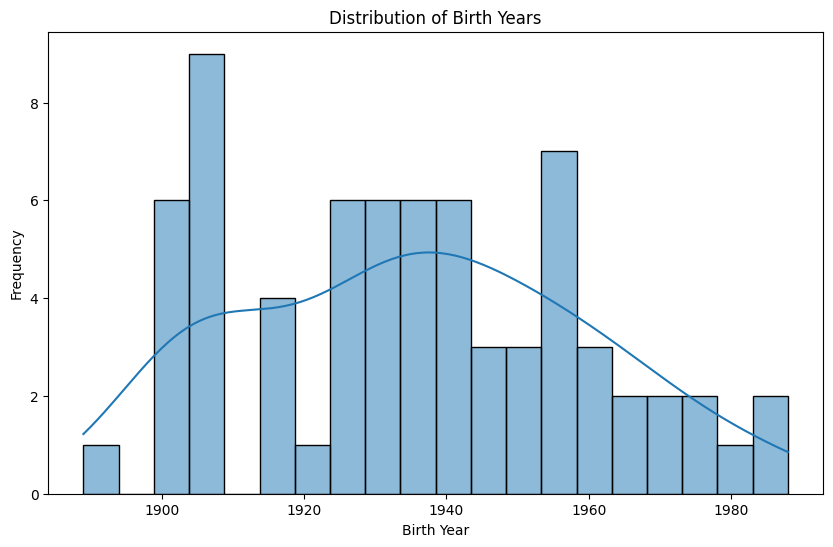

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Birth Year'], bins=20, kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()


T-test for significance

In [110]:
birth_year_before_1950 = merged_data[merged_data['Birth Year'] < 1950]['Year of Breakthrough/#1 Hit/Award Nomination']
birth_year_after_1950 = merged_data[merged_data['Birth Year'] >= 1950]['Year of Breakthrough/#1 Hit/Award Nomination']
t_stat, p_value = ttest_ind(birth_year_before_1950, birth_year_after_1950)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -9.149109756774807, p-value: 1.8175858111495902e-13


classifier Accuracy

In [111]:
merged_data['Breakthrough_Class'] = merged_data['Year of Breakthrough/#1 Hit/Award Nomination'].apply(lambda x: 1 if x >= 2000 else 0)
X = merged_data[['Birth Year']]
y = merged_data['Breakthrough_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the classifier: {accuracy}")


Accuracy of the classifier: 1.0


Distribution of Sentiment Scores

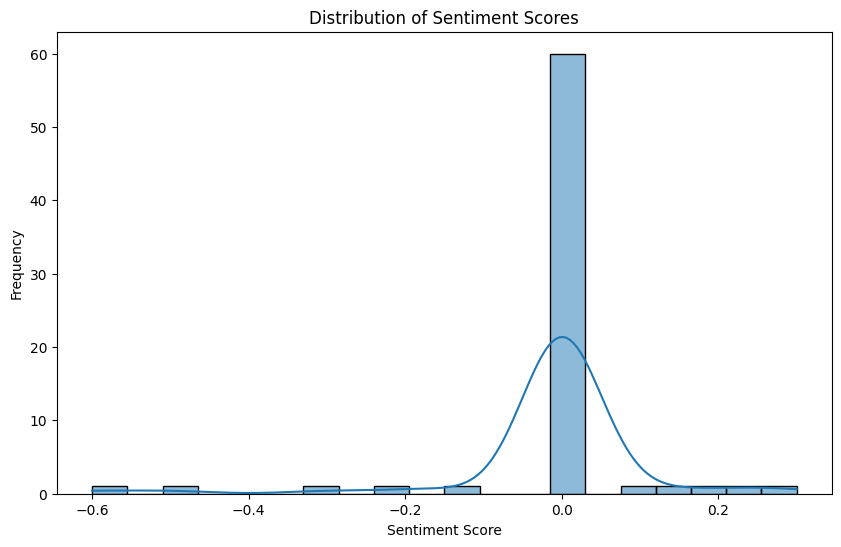

In [112]:
merged_data['Sentiment'] = merged_data['Breakthrough Name'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Interactive Scatter Plot of Birth Year vs. Breakthrough Year

In [113]:
fig = px.scatter(merged_data, x='Birth Year', y='Year of Breakthrough/#1 Hit/Award Nomination',
                 hover_data=['Entertainer'], labels={'Year of Breakthrough/#1 Hit/Award Nomination': 'Breakthrough Year'})
fig.update_layout(title='Interactive Scatter Plot of Birth Year vs. Breakthrough Year',
                  xaxis_title='Birth Year', yaxis_title='Breakthrough Year')
fig.show()

Word Cloud of Breakthrough Names

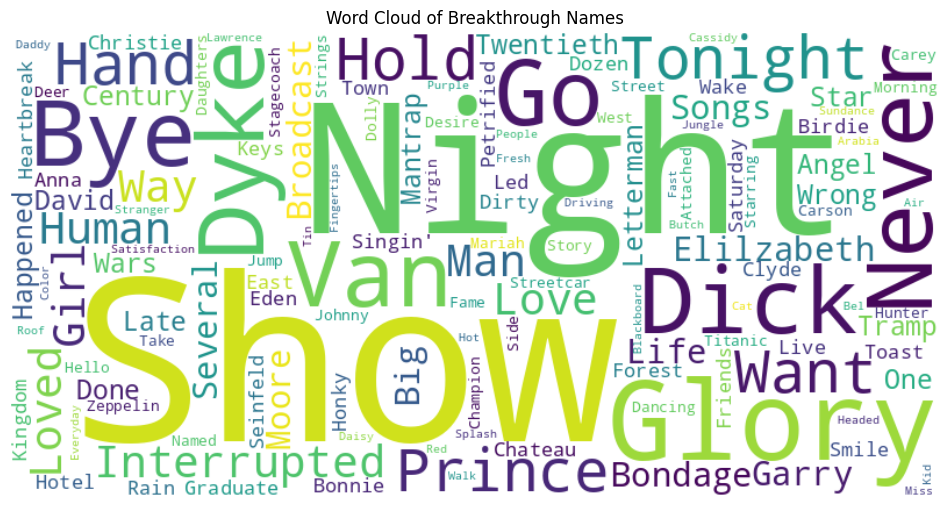

In [114]:
all_breakthrough_names = ' '.join(merged_data['Breakthrough Name'].astype(str))
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(all_breakthrough_names)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Breakthrough Names')
plt.show()

Interactive Distributions of Key Timelines

In [115]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=('Birth Year Distribution', 'Breakthrough Year Distribution', 'Last Major Work Year Distribution'))
fig.add_trace(go.Histogram(x=merged_data['Birth Year'], nbinsx=20), row=1, col=1)
fig.add_trace(go.Histogram(x=merged_data['Year of Breakthrough/#1 Hit/Award Nomination'], nbinsx=20), row=2, col=1)
fig.add_trace(go.Histogram(x=merged_data['Year of Last Major Work (arguable)'], nbinsx=20), row=3, col=1)
fig.update_layout(title_text='Interactive Distributions of Key Timelines')
fig.update_xaxes(title_text='Year', row=3, col=1)
fig.update_yaxes(title_text='Frequency', row=2, col=1)
fig.show()

Statistical Hypothesis Testing

In [116]:
male_breakthrough_years = merged_data[merged_data['Gender (traditional)'] == 'M']['Year of Breakthrough/#1 Hit/Award Nomination']
female_breakthrough_years = merged_data[merged_data['Gender (traditional)'] == 'F']['Year of Breakthrough/#1 Hit/Award Nomination']
t_stat, p_value = ttest_ind(male_breakthrough_years, female_breakthrough_years, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -0.14708021764843118, p-value: 0.884152768737152


K-Means Clustering of Entertainers Based on Key Features

In [117]:
features_for_clustering = ['Birth Year', 'Year of Breakthrough/#1 Hit/Award Nomination', 'Year of Last Major Work (arguable)']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data[features_for_clustering])
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
cluster_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
cluster_df['Cluster'] = merged_data['Cluster']
fig = px.scatter(cluster_df, x='PCA1', y='PCA2', color='Cluster', hover_data=[merged_data['Entertainer']])
fig.update_layout(title='K-Means Clustering of Entertainers Based on Key Features',
                  xaxis_title='Principal Component 1', yaxis_title='Principal Component 2')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



merged data columns

In [118]:
print(merged_data.columns)

Index(['Entertainer', 'Gender (traditional)', 'Birth Year',
       'Year of Breakthrough/#1 Hit/Award Nomination', 'Breakthrough Name',
       'Year of First Oscar/Grammy/Emmy', 'Year of Last Major Work (arguable)',
       'Year of Death', 'Breakthrough_Class', 'Sentiment', 'Cluster'],
      dtype='object')


Interactive Scatter Plot with Details on Demand

In [119]:
fig = px.scatter(merged_data, x='Birth Year', y='Year of Breakthrough/#1 Hit/Award Nomination',
                 color='Gender (traditional)', size='Year of Last Major Work (arguable)',
                 hover_data=['Entertainer'], labels={'Year of Breakthrough/#1 Hit/Award Nomination': 'Breakthrough Year'})
fig.update_layout(title='Interactive Scatter Plot with Details on Demand',
                  xaxis_title='Birth Year', yaxis_title='Breakthrough Year')
fig.show()

Violin Plot for Comparing Breakthrough Years by Gender

In [120]:
fig = px.violin(merged_data, x='Gender (traditional)', y='Year of Breakthrough/#1 Hit/Award Nomination',
                box=True, points="all", hover_data=['Entertainer'], labels={'Year of Breakthrough/#1 Hit/Award Nomination': 'Breakthrough Year'})
fig.update_layout(title='Violin Plot for Comparing Breakthrough Years by Gender')
fig.show()

Heatmap for Correlation Matrix

In [121]:
correlation_matrix = merged_data[['Birth Year', 'Year of Breakthrough/#1 Hit/Award Nomination', 'Year of Last Major Work (arguable)']].corr()
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                                x=correlation_matrix.columns,
                                y=correlation_matrix.columns,
                                colorscale='Viridis'))
fig.update_layout(title='Heatmap of Correlation Matrix',
                  xaxis_title='Features', yaxis_title='Features')
fig.show()


Gender Distribution Bar Chart

In [122]:
gender_distribution = merged_data['Gender (traditional)'].value_counts()
fig = px.bar(gender_distribution, x=gender_distribution.index, y=gender_distribution.values,
             labels={'x': 'Gender', 'y': 'Count'},
             title='Gender Distribution of Entertainers')
fig.show()

Breakthrough Type Pie Chart

In [123]:
breakthrough_distribution = merged_data['Breakthrough_Class'].value_counts()
fig = px.pie(breakthrough_distribution, labels=breakthrough_distribution.index, values=breakthrough_distribution.values,
             title='Distribution of Breakthrough Types')
fig.show()



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Trends Over the Years Line Chart

In [124]:
trends_over_years = merged_data.groupby('Birth Year').size().reset_index(name='Count')
fig = px.line(trends_over_years, x='Birth Year', y='Count',
              labels={'x': 'Birth Year', 'y': 'Number of Entertainers'},
              title='Trends of Entertainers Over the Years')
fig.show()

## Over All Analysis

**1. Geographical Distribution of Entertainers:**
* The geographical plot displayed the distribution
of entertainers across different countries.
* Points were colored by gender and sized by birth year.
* Identified prominent locations of entertainers.

**2. Gender Distribution:**
* The bar chart illustrated the distribution of genders among entertainers.
* Assessed the representation of male and female entertainers in the dataset.

**3. Breakthrough Types Distribution:**
* The pie chart showed the distribution of breakthrough types among entertainers.
* Explored the variety of breakthroughs, such as film roles, music hits, and awards.

**4. Trends Over the Years:**
* The line chart visualized the trends of entertainers over the years based on birth years.
* Identified periods with higher or lower numbers of entertainers born.

**5. Breakthrough Years by Gender:**
* The violin plot compared breakthrough years between male and female entertainers.
* Examined the distribution of breakthrough years for different genders.

**6. Correlation Matrix:**
* The heatmap displayed the correlation matrix between birth year, breakthrough year, and the year of the last major work.
* Explored relationships between key numeric features in the dataset.

**7. Sentiment Analysis and Clustering:**
* Conducted sentiment analysis on entertainer names and used clustering algorithms.
* Grouped entertainers based on the sentiment of their names.

**8. Machine Learning Classification:**
* Applied a machine learning model (Random Forest Classifier) to predict breakthrough types.
* Split the data into training and testing sets for model evaluation.

**9. Word Clouds:**
* Generated word clouds to visualize prominent breakthrough names and last major works.
* Identified key terms associated with breakthroughs and major works.

**10. Additional Visualizations:**
* Included various visualizations like an interactive scatter plot, a violin plot, and a heatmap.
* Explored relationships, distributions, and trends within the data.